<a href="https://colab.research.google.com/github/RafaSFernandes/DS_Projects/blob/main/Series_Temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Escola DNC

Aluno: Rafael Souza Fernandes

Material de estudo

#0. Recursos iniciais

##0.1. Bibliotecas

In [109]:
# Dados
import pandas as pd

# Matemática
import numpy as np
# from random import randint

# Tempo
from datetime import datetime, timedelta

# Sistema
import os

# Gráficos
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
# Sklearn

# Separação de treino e teste
from sklearn.model_selection import train_test_split

# Cross Validation
# from sklearn.model_selection import cross_val_score #KFold

#Preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Metrics
# from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error, mean_squared_error, mean_absolute_percentage_error
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.metrics import classification_report

##0.2. Funções

In [111]:
#Leitura do dataset
def read_file_csv(path, filename):
  # Verifica se o Google Drive já está montado
  if not os.path.ismount('/content/drive'):
    # Montagem do drive para importar base de dados
    from google.colab import drive
    drive.mount('/content/drive')

  # Leitura do arquivo
  df = pd.read_csv(path + filename)

  return df

In [112]:
def residual_plot(y_pred, residuals):
  plt.scatter(x=y_pred, y=residuals, s=5) #plot dos pontos residuais
  plt.axhline(0, color="red", linestyle="--") #plot de linha horizontal (zero)

  #rótulos
  plt.xlabel("Predicted values")
  plt.ylabel("Residuals")

  plt.title("Residual plot") #titulo

  plt.show() #exibe o plot gráfico

In [113]:
#report de regressão
def regression_report(y_true, y_pred): #definindo a função

  MAE = mean_absolute_error(y_true, y_pred)
  MSE = mean_squared_error(y_true, y_pred)
  RMSE = root_mean_squared_error(y_true, y_pred)
  MAPE = mean_absolute_percentage_error(y_true, y_pred)
  R2 = r2_score(y_true, y_pred)

  #criando o report no formato tipo Series
  report = pd.Series({
      "MAE" : MAE,
      "MSE" : MSE,
      "RMSE": RMSE,
      "MAPE": MAPE,
      "R2"  : R2
  })

  return report

#1. Importando Dados

In [114]:
path = "/content/drive/MyDrive/Datasets_Modulos/Materia_09/"
filename = "rossman_store_sales.csv"

In [115]:
df = read_file_csv(path, filename)

/tmp/ipython-input-2802796421.py:10: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path + filename)


#2. Explorando Dados

In [116]:
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [117]:
df.shape

(1017209, 9)

In [118]:
df.dtypes

,0
Store,int64
DayOfWeek,int64
Date,object
Sales,int64
Customers,int64
Open,int64
Promo,int64
StateHoliday,object
SchoolHoliday,int64


In [119]:
df["Date"] = pd.to_datetime(df["Date"])

In [120]:
df.nunique()

,0
Store,1115
DayOfWeek,7
Date,942
Sales,21734
Customers,4086
Open,2
Promo,2
StateHoliday,5
SchoolHoliday,2


#3. Separação (train x test)

##3.1. Criando o TimeSeries principal

In [121]:
# Soma de valores arrecadados por dia (TimeSeries principal)
df_ts = df.groupby("Date")["Sales"].sum()

In [122]:
# Exibindo o TS
df_ts

,Sales
Date,
2013-01-01,97235
2013-01-02,6949829
2013-01-03,6347820
2013-01-04,6638954
2013-01-05,5951593
...,...
2015-07-27,10707292
2015-07-28,9115073
2015-07-29,8499962


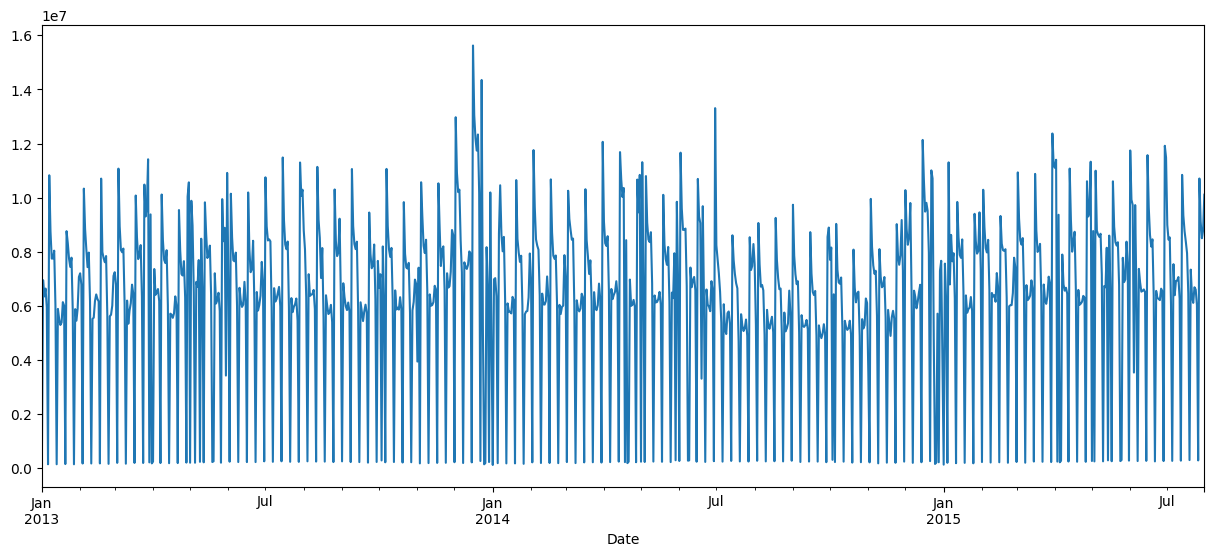

In [123]:
# Gráfico
df_ts.plot(figsize=(15, 6));

##3.2. Separação dos dados por data de corte

In [124]:
# Criando da data de corte dos dados
cut_date = "2015-01-01"

In [125]:
# Valores antes da data de corte
before = (pd.to_datetime(cut_date) - pd.Timedelta(days=1)).strftime("%Y-%m-%d")

In [126]:
# Speração train e test pela data de corte
train = df_ts[:before]
test = df_ts[cut_date:]

In [127]:
# Verificando início e fim dos dados de treino
print(train.index.min().strftime("%Y-%m-%d"), train.index.max().strftime("%Y-%m-%d"))

2013-01-01 2014-12-31


In [128]:
# Verificando início e fim dos dados de teste
print(test.index.min().strftime("%Y-%m-%d"), test.index.max().strftime("%Y-%m-%d"))

2015-01-01 2015-07-31


##3.3. Separação dos dados usando TimeSeriesSplit

In [129]:
from sklearn.model_selection import TimeSeriesSplit

In [130]:
# Definição do formato de data sem os valores de HH:MM:SS
def YMD(data):
  return data.strftime("%Y-%m-%d")

In [131]:
# Time Series Cross Validation
tscv = TimeSeriesSplit(n_splits=3) # Definindo o cross validation com 3 splits

for train_index, test_index in tscv.split(df_ts): # Para cada indice de treino e teste do split
  train_fold = df_ts.iloc[train_index]  # Define o fold de treino
  test_fold = df_ts.iloc[test_index]    # Define o fold de test

  print("Train Size:", train_fold.size) # Tamanho do fold
  print("TRAIN:", YMD(train_fold.index.min()), "-", YMD(train_fold.index.max())) # Datas de inicio e fim de train neste fold
  print("TEST:", YMD(test_fold.index.min()), "-", YMD(test_fold.index.max()))    # Datas de inicio e fim de test neste fold

Train Size: 237
TRAIN: 2013-01-01 - 2013-08-25
TEST: 2013-08-26 - 2014-04-17
Train Size: 472
TRAIN: 2013-01-01 - 2014-04-17
TEST: 2014-04-18 - 2014-12-08
Train Size: 707
TRAIN: 2013-01-01 - 2014-12-08
TEST: 2014-12-09 - 2015-07-31


In [132]:
# Calcula a média num intervalo de 7 dias (os primeiros 6 são nulos pois não há 7 dias completos para o cálculo de média)
df_ts.rolling(7).mean().head(10)

,Sales
Date,
2013-01-01,NaN
2013-01-02,NaN
2013-01-03,NaN
2013-01-04,NaN
2013-01-05,NaN
2013-01-06,NaN
2013-01-07,5.279455e+06
2013-01-08,6.515484e+06
2013-01-09,6.629308e+06


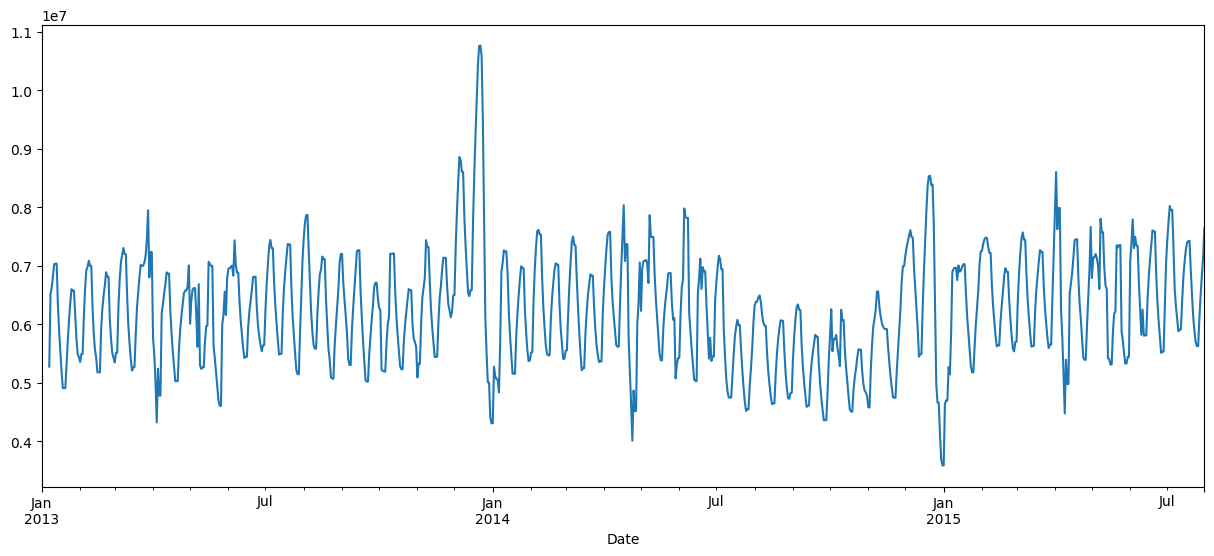

In [133]:
# Plot do gráfico de médias
df_ts.rolling(7).mean().plot(figsize=(15, 6));

In [134]:
# Transformando o Series em DataFrame
df_ts = df_ts.to_frame()

In [135]:
# Criando os lags (deslocamentos de dados em linha)

for lag in range(1,8):  # Para cada lag não nulo menor que 8
  df_ts[f"lag_{lag}"] = df_ts["Sales"].shift(lag)  # Cria a coluna lag com o delocamento de linhas correspondente ao valor do lag

In [136]:
# Verificando os dados após alteração
df_ts

,Sales,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
Date,,,,,,,,
2013-01-01,97235,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,6949829,97235.0,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,6347820,6949829.0,97235.0,NaN,NaN,NaN,NaN,NaN
2013-01-04,6638954,6347820.0,6949829.0,97235.0,NaN,NaN,NaN,NaN
2013-01-05,5951593,6638954.0,6347820.0,6949829.0,97235.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2015-07-27,10707292,285865.0,6021666.0,6601325.0,6687068.0,6110388.0,6356482.0,7339321.0
2015-07-28,9115073,10707292.0,285865.0,6021666.0,6601325.0,6687068.0,6110388.0,6356482.0
2015-07-29,8499962,9115073.0,10707292.0,285865.0,6021666.0,6601325.0,6687068.0,6110388.0


In [137]:
# Calculando as médias móveis (média dos lags por linha)

for window in [7, 15, 30]: # Para cada window na lista

  # Cria a coluna rolling_mean com a média dos valores no intervalo windows, deslocando todas as médias 1 linha para baixo
  df_ts[f"rolling_mean_{window}"] = df_ts["Sales"].shift(1).rolling(window).mean()

In [138]:
# Exibindo as primeiras 31 linhas (para verificar o primeiro vlaor não nulo em rolling_mean_30)
df_ts.head(31)

,Sales,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,rolling_mean_7,rolling_mean_15,rolling_mean_30
Date,,,,,,,,,,,
2013-01-01,97235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,6949829,97235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,6347820,6949829.0,97235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-04,6638954,6347820.0,6949829.0,97235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-05,5951593,6638954.0,6347820.0,6949829.0,97235.0,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-06,143904,5951593.0,6638954.0,6347820.0,6949829.0,97235.0,NaN,NaN,NaN,NaN,NaN
2013-01-07,10826848,143904.0,5951593.0,6638954.0,6347820.0,6949829.0,97235.0,NaN,NaN,NaN,NaN
2013-01-08,8749437,10826848.0,143904.0,5951593.0,6638954.0,6347820.0,6949829.0,97235.0,5.279455e+06,NaN,NaN
2013-01-09,7746603,8749437.0,10826848.0,143904.0,5951593.0,6638954.0,6347820.0,6949829.0,6.515484e+06,NaN,NaN


In [139]:
# Separação train x test (shuffle False para não remover a ordenação temporal)
train, test = train_test_split(df_ts, test_size=0.3, shuffle=False, random_state=42)

In [140]:
train

,Sales,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,rolling_mean_7,rolling_mean_15,rolling_mean_30
Date,,,,,,,,,,,
2013-01-01,97235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,6949829,97235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,6347820,6949829.0,97235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-04,6638954,6347820.0,6949829.0,97235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-05,5951593,6638954.0,6347820.0,6949829.0,97235.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2014-10-17,5449686,5179446.0,5110401.0,5213744.0,5445980.0,240423.0,5190193.0,7047404.0,4.775370e+06,5.239416e+06,5.296749e+06
2014-10-18,4945733,5449686.0,5179446.0,5110401.0,5213744.0,5445980.0,240423.0,5190193.0,4.547125e+06,5.059009e+06,5.261281e+06
2014-10-19,204991,4945733.0,5449686.0,5179446.0,5110401.0,5213744.0,5445980.0,240423.0,4.512202e+06,5.368192e+06,5.212889e+06


In [141]:
test

,Sales,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,rolling_mean_7,rolling_mean_15,rolling_mean_30
Date,,,,,,,,,,,
2014-10-22,6129832,6677374.0,8078830.0,204991.0,4945733.0,5449686.0,5179446.0,5110401.0,5.092352e+06,5.320238e+06,5.321312e+06
2014-10-23,6463607,6129832.0,6677374.0,8078830.0,204991.0,4945733.0,5449686.0,5179446.0,5.237985e+06,5.240041e+06,5.349719e+06
2014-10-24,6523289,6463607.0,6129832.0,6677374.0,8078830.0,204991.0,4945733.0,5449686.0,5.421436e+06,5.212963e+06,5.399268e+06
2014-10-25,4894704,6523289.0,6463607.0,6129832.0,6677374.0,8078830.0,204991.0,4945733.0,5.574808e+06,5.193396e+06,5.456511e+06
2014-10-26,219359,4894704.0,6523289.0,6463607.0,6129832.0,6677374.0,8078830.0,204991.0,5.567518e+06,5.049882e+06,5.454015e+06
...,...,...,...,...,...,...,...,...,...,...,...
2015-07-27,10707292,285865.0,6021666.0,6601325.0,6687068.0,6110388.0,6356482.0,7339321.0,5.628874e+06,6.112505e+06,6.509776e+06
2015-07-28,9115073,10707292.0,285865.0,6021666.0,6601325.0,6687068.0,6110388.0,6356482.0,6.110012e+06,6.807855e+06,6.648742e+06
2015-07-29,8499962,9115073.0,10707292.0,285865.0,6021666.0,6601325.0,6687068.0,6110388.0,6.504097e+06,6.692775e+06,6.943822e+06


In [142]:
train.shape

(659, 11)

In [143]:
# Removendo as 30 primeiras linhas com valores nulos
train = train.dropna()

In [144]:
train.shape

(629, 11)

In [145]:
X_train = train.drop(columns="Sales")
y_train = train["Sales"]

X_test = test.drop(columns="Sales")
y_test = test["Sales"]

In [146]:
X_train

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,rolling_mean_7,rolling_mean_15,rolling_mean_30
Date,,,,,,,,,,
2013-01-31,5909779.0,5452668.0,5878702.0,142848.0,5848770.0,7780789.0,7439836.0,5.493342e+06,5.750647e+06,5.768788e+06
2013-02-01,7068567.0,5909779.0,5452668.0,5878702.0,142848.0,5848770.0,7780789.0,5.440303e+06,5.869017e+06,6.001166e+06
2013-02-02,7203007.0,7068567.0,5909779.0,5452668.0,5878702.0,142848.0,5848770.0,5.357763e+06,5.990113e+06,6.009605e+06
2013-02-03,6781741.0,7203007.0,7068567.0,5909779.0,5452668.0,5878702.0,142848.0,5.491045e+06,6.033095e+06,6.024069e+06
2013-02-04,171565.0,6781741.0,7203007.0,7068567.0,5909779.0,5452668.0,5878702.0,5.495147e+06,5.643853e+06,5.808489e+06
...,...,...,...,...,...,...,...,...,...,...
2014-10-17,5179446.0,5110401.0,5213744.0,5445980.0,240423.0,5190193.0,7047404.0,4.775370e+06,5.239416e+06,5.296749e+06
2014-10-18,5449686.0,5179446.0,5110401.0,5213744.0,5445980.0,240423.0,5190193.0,4.547125e+06,5.059009e+06,5.261281e+06
2014-10-19,4945733.0,5449686.0,5179446.0,5110401.0,5213744.0,5445980.0,240423.0,4.512202e+06,5.368192e+06,5.212889e+06


#4. Modelagem

In [147]:
# Criando e treinando o modelo de RFR
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [148]:
# Prevendo os valores
y_pred = model.predict(X_test)

In [149]:
# Avaliando o modelo
regression_report(y_test, y_pred).map('{:.2f}'.format)

,0
MAE,901855.88
MSE,2861648038032.15
RMSE,1691640.64
MAPE,1.11
R2,0.72


In [150]:
# Residuos
residuals = y_test - y_pred

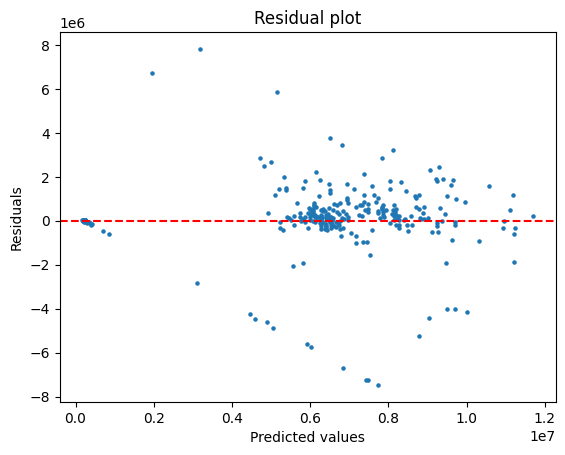

In [151]:
# Plot dos resíduos
residual_plot(y_pred, residuals)

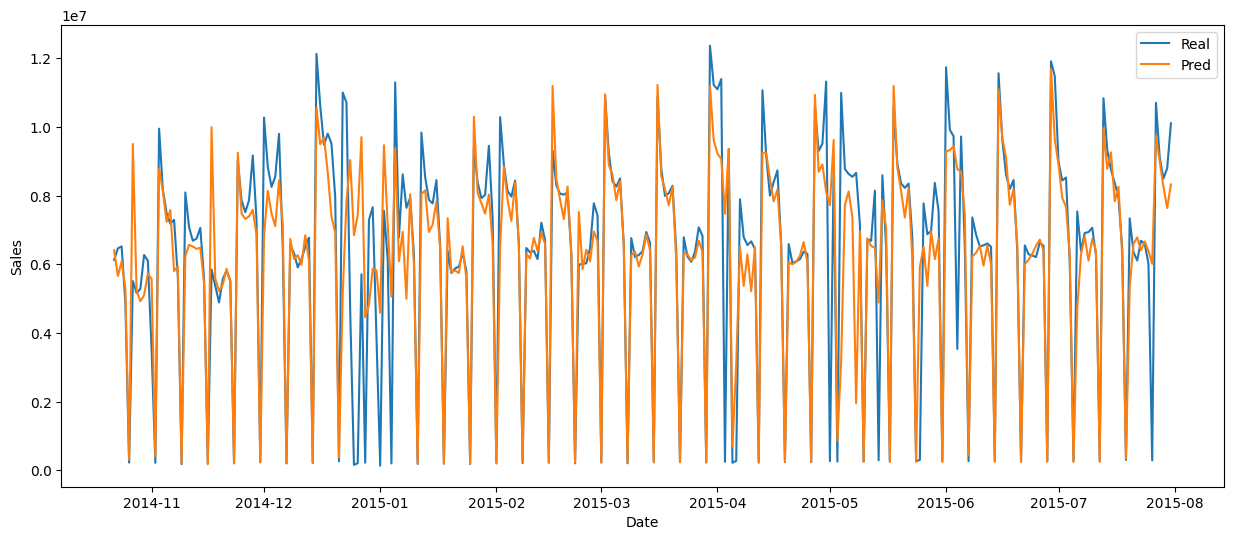

In [152]:
plt.figure(figsize=(15, 6))

plt.plot(y_test.index, y_test, label="Real")
plt.plot(y_test.index, y_pred, label="Pred")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [153]:
# Exibindo df
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [154]:
# Contabilizando quantidade de lojas abertas por dia
df_open_features = df.groupby("Date")["Open"].sum()
df_open_features

,Open
Date,
2013-01-01,17
2013-01-02,1111
2013-01-03,1109
2013-01-04,1108
2013-01-05,1107
...,...
2015-07-27,1113
2015-07-28,1113
2015-07-29,1113


In [155]:
# Contabilizando quantidade de promoções por dia
df_promo_features = df.groupby("Date")["Promo"].sum()
df_promo_features

,Promo
Date,
2013-01-01,0
2013-01-02,0
2013-01-03,0
2013-01-04,0
2013-01-05,0
...,...
2015-07-27,1115
2015-07-28,1115
2015-07-29,1115


In [156]:
# Concatenando ao dataframe principal
df_ts = pd.concat([df_ts, df_open_features, df_promo_features], axis=1)
df_ts

,Sales,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,rolling_mean_7,rolling_mean_15,rolling_mean_30,Open,Promo
Date,,,,,,,,,,,,,
2013-01-01,97235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,0
2013-01-02,6949829,97235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1111,0
2013-01-03,6347820,6949829.0,97235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1109,0
2013-01-04,6638954,6347820.0,6949829.0,97235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1108,0
2013-01-05,5951593,6638954.0,6347820.0,6949829.0,97235.0,NaN,NaN,NaN,NaN,NaN,NaN,1107,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-27,10707292,285865.0,6021666.0,6601325.0,6687068.0,6110388.0,6356482.0,7339321.0,5.628874e+06,6.112505e+06,6.509776e+06,1113,1115
2015-07-28,9115073,10707292.0,285865.0,6021666.0,6601325.0,6687068.0,6110388.0,6356482.0,6.110012e+06,6.807855e+06,6.648742e+06,1113,1115
2015-07-29,8499962,9115073.0,10707292.0,285865.0,6021666.0,6601325.0,6687068.0,6110388.0,6.504097e+06,6.692775e+06,6.943822e+06,1113,1115


In [158]:
# Verificando o dia da semana
df_ts["DayOfWeek"] = df_ts.index.dayofweek

In [159]:
# Exbindo o dataframe atualizado
df_ts

,Sales,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,rolling_mean_7,rolling_mean_15,rolling_mean_30,Open,Promo,DayOfWeek
Date,,,,,,,,,,,,,,
2013-01-01,97235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,0,1
2013-01-02,6949829,97235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1111,0,2
2013-01-03,6347820,6949829.0,97235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1109,0,3
2013-01-04,6638954,6347820.0,6949829.0,97235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1108,0,4
2013-01-05,5951593,6638954.0,6347820.0,6949829.0,97235.0,NaN,NaN,NaN,NaN,NaN,NaN,1107,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-27,10707292,285865.0,6021666.0,6601325.0,6687068.0,6110388.0,6356482.0,7339321.0,5.628874e+06,6.112505e+06,6.509776e+06,1113,1115,0
2015-07-28,9115073,10707292.0,285865.0,6021666.0,6601325.0,6687068.0,6110388.0,6356482.0,6.110012e+06,6.807855e+06,6.648742e+06,1113,1115,1
2015-07-29,8499962,9115073.0,10707292.0,285865.0,6021666.0,6601325.0,6687068.0,6110388.0,6.504097e+06,6.692775e+06,6.943822e+06,1113,1115,2


In [160]:
# Separação train x test
train, test = train_test_split(df_ts, test_size=0.3, shuffle=False, random_state=42)

In [165]:
# Removendo linhas nulas
train.dropna(inplace=True)

In [167]:
# Separação X e y
X_train = train.drop(columns="Sales")
y_train = train["Sales"]

X_test = test.drop(columns="Sales")
y_test = test["Sales"]

In [168]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [169]:
y_pred = model.predict(X_test)

In [170]:
residuals = y_pred - y_test

In [171]:
regression_report(y_test, y_pred).map('{:.2f}'.format)

,0
MAE,498977.16
MSE,729091661010.67
RMSE,853868.64
MAPE,0.08
R2,0.93


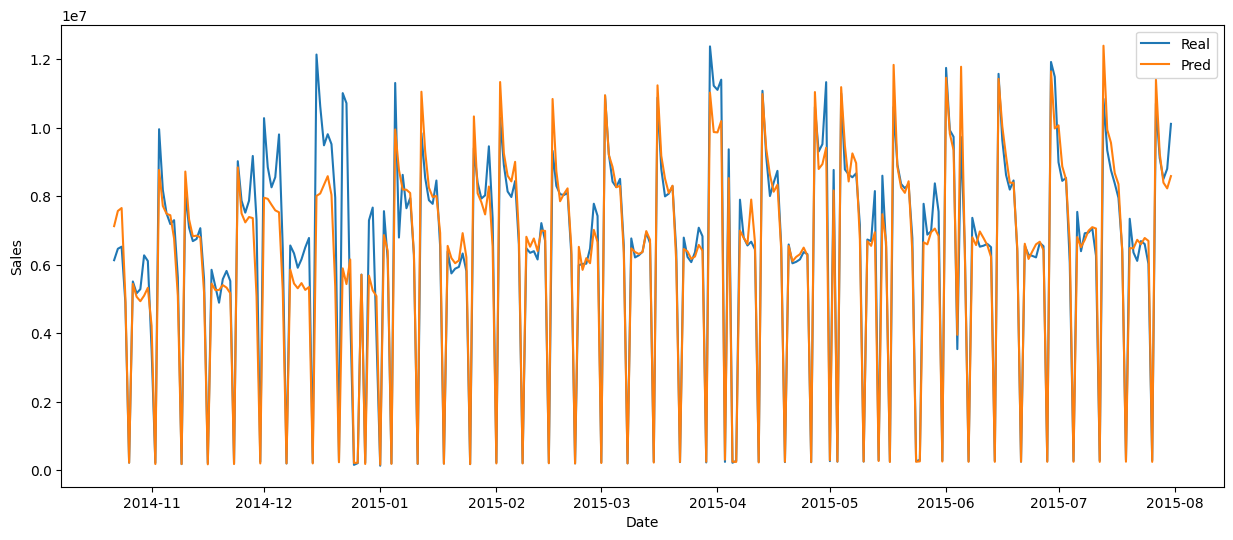

In [172]:
plt.figure(figsize=(15, 6))

plt.plot(y_test.index, y_test, label="Real")
plt.plot(y_test.index, y_pred, label="Pred")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()